In [17]:
# 1. Data Exploration

# a. Load the dataset and perform exploratory data analysis (EDA)
import pandas as pd
train_df = pd.read_csv('Titanic_train.csv')
test_df = pd.read_csv('Titanic_test.csv')
train_df
print(test_df)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [19]:
# b. Examine the features, their types, and summary statistics

train_df_info = train_df.info()
train_df_description = train_df.describe(include='all')
train_df_info
print(train_df_description)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top       

C:\Users\Kanta. Sai Dhanush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kanta. Sai Dhanush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kanta. Sai Dhanush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Kanta. Sai Dhanush\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future

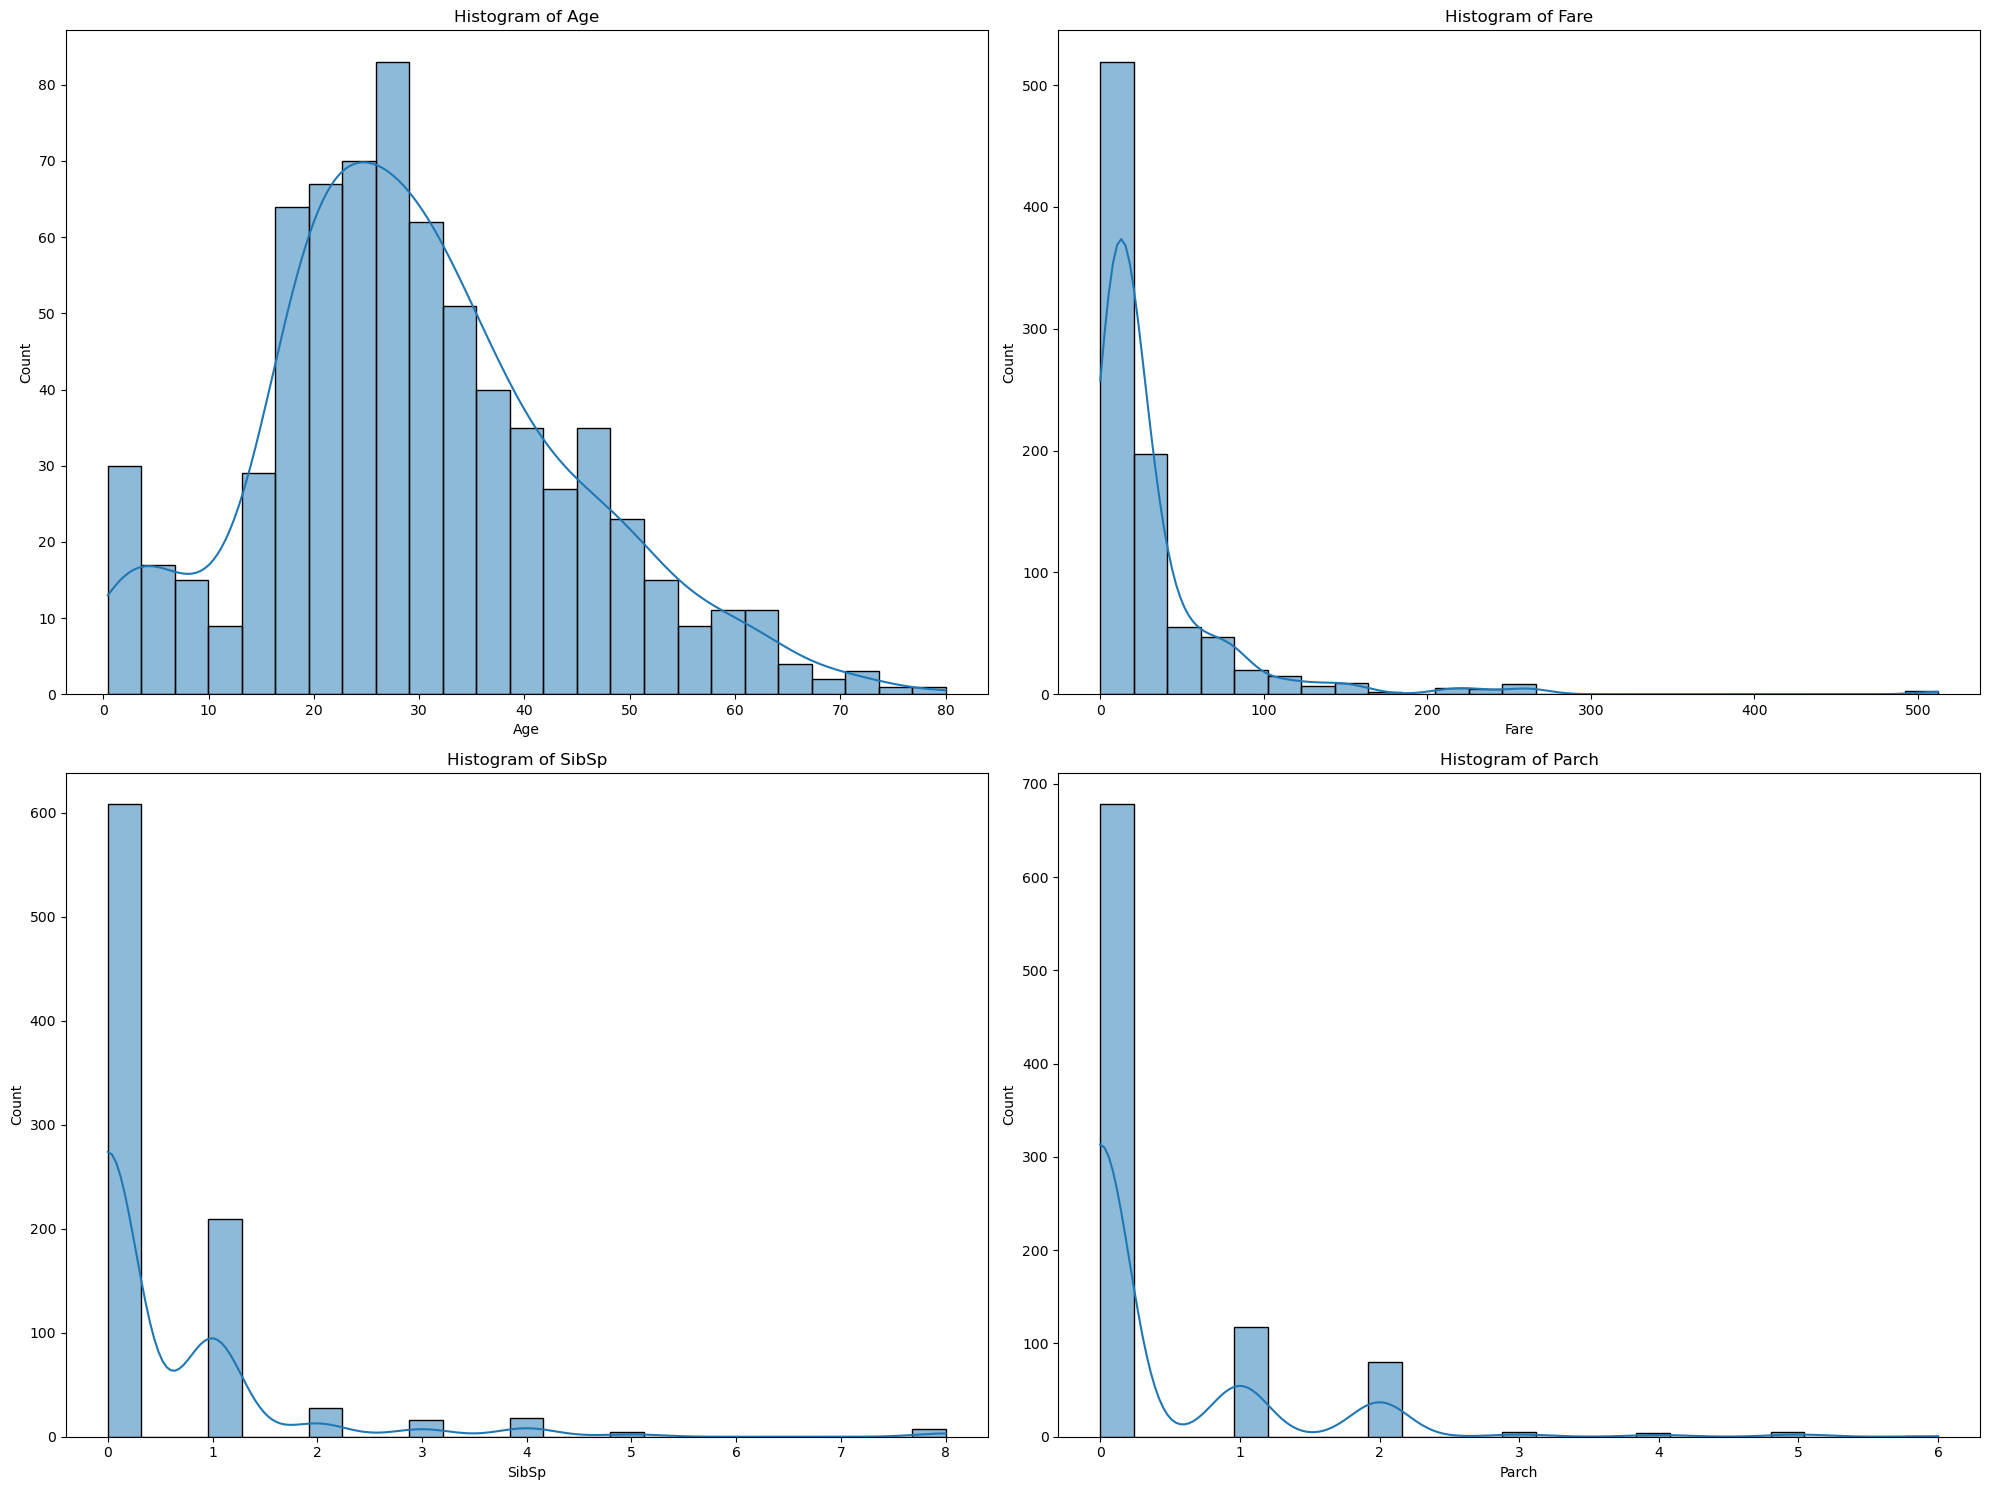

In [25]:
# c. Create visualizations

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))
# Histogram for numerical variables
numerical_vars = ['Age', 'Fare', 'SibSp', 'Parch']
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(train_df[var].dropna(), kde=True, bins=25)
    plt.title(f'Histogram of {var}')

plt.tight_layout()
plt.show()

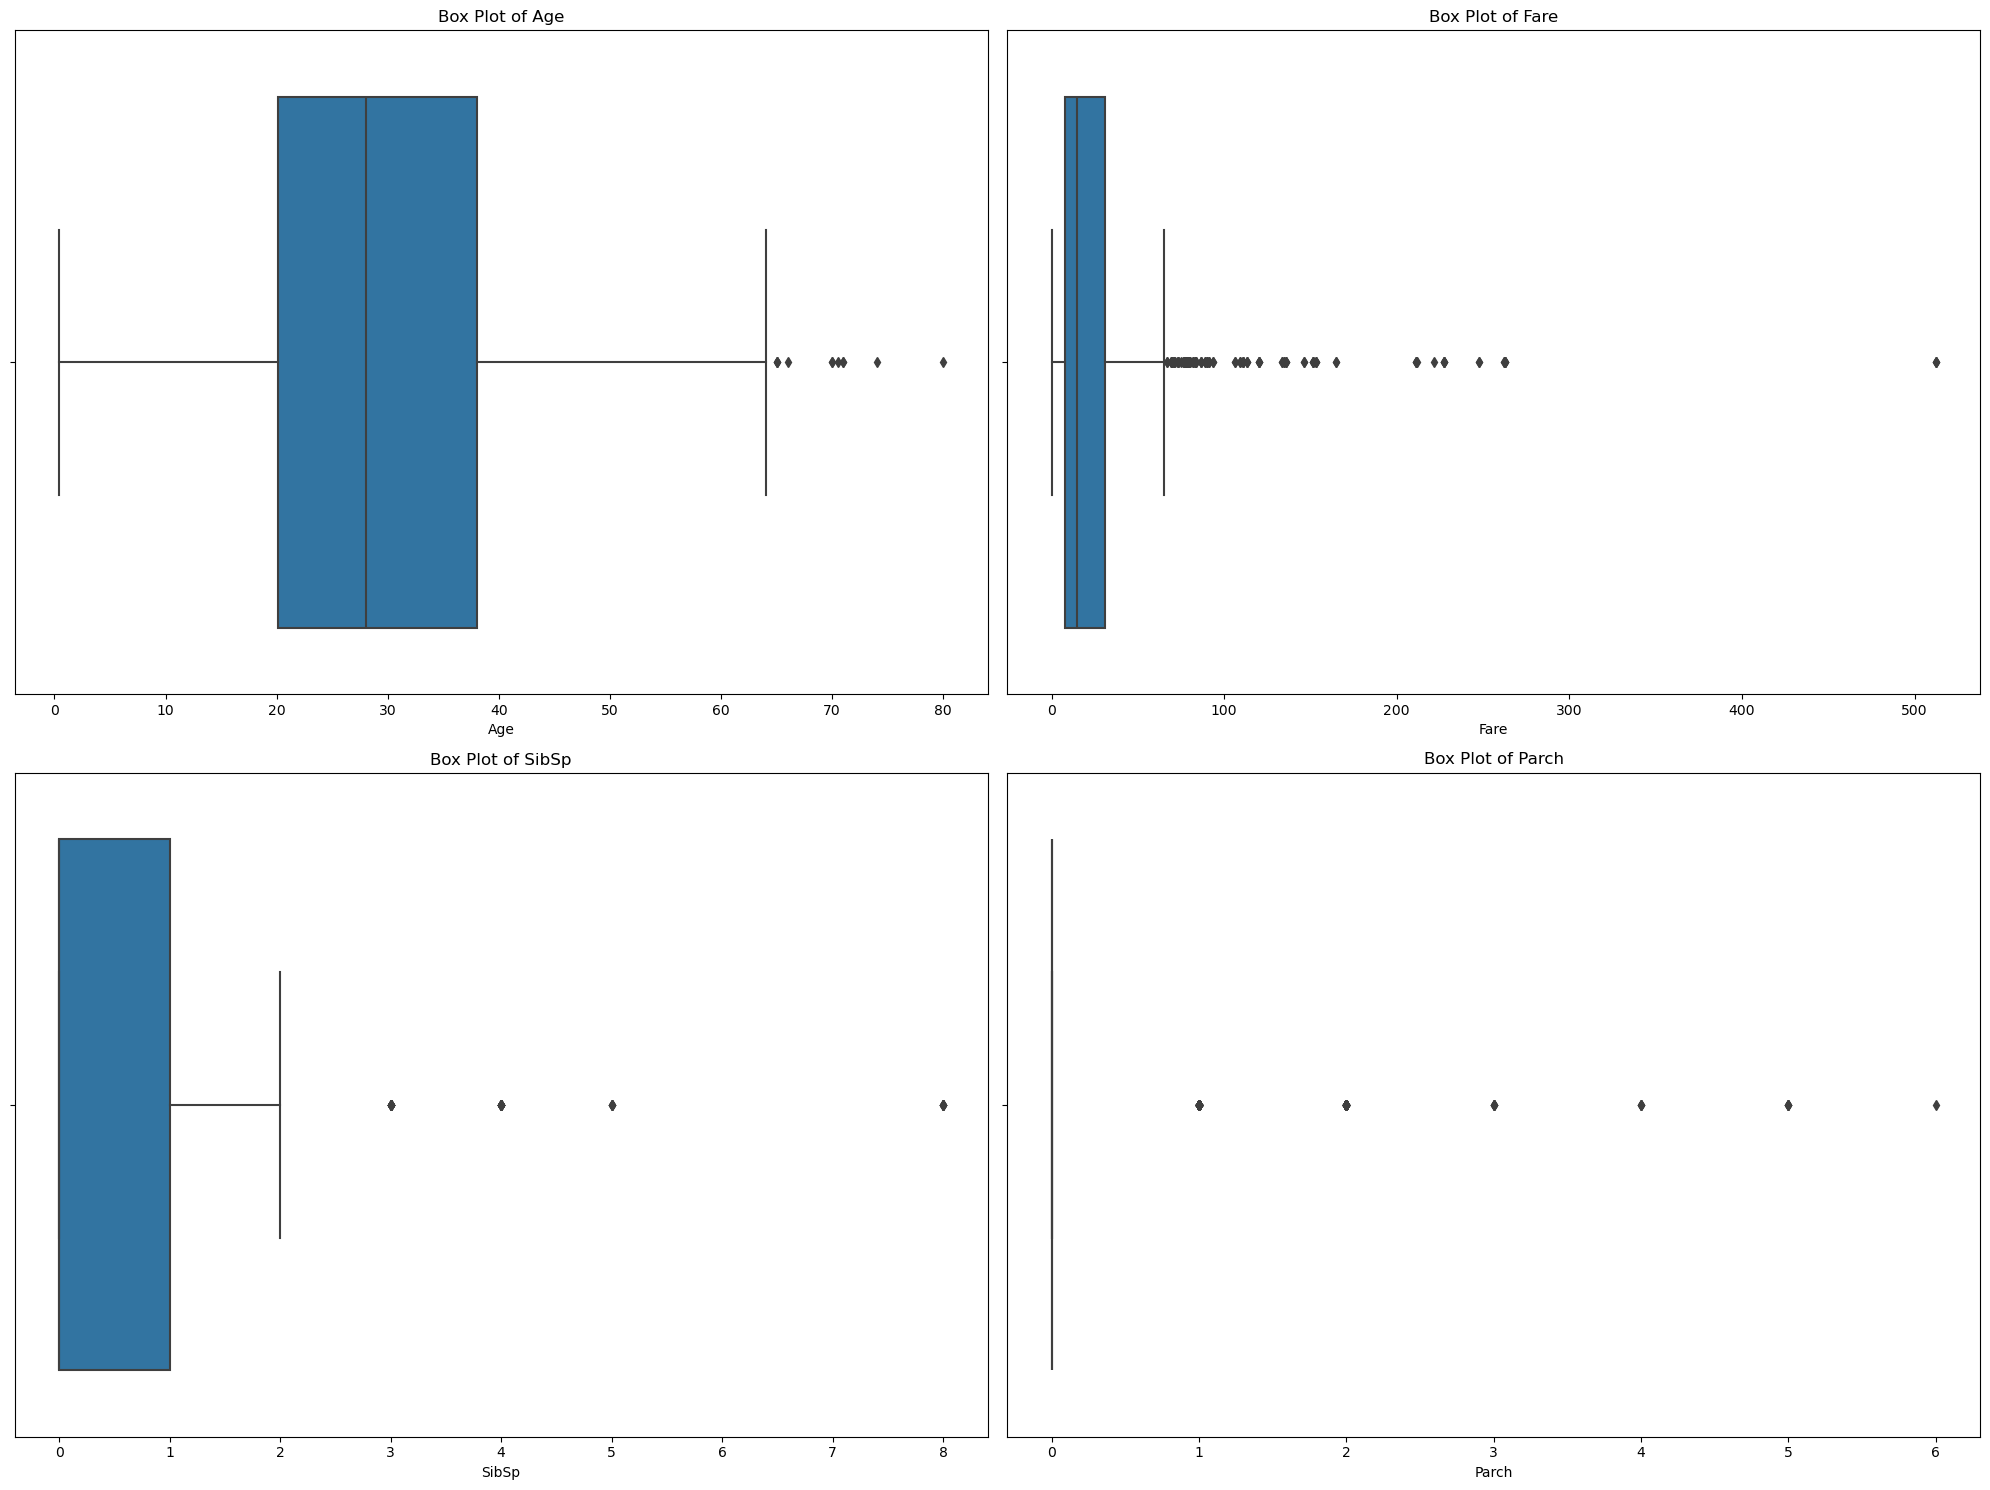

In [21]:
# Box plots for numerical variables
plt.figure(figsize=(20, 15))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=train_df[var])
    plt.title(f'Box Plot of {var}')

plt.tight_layout()
plt.show()

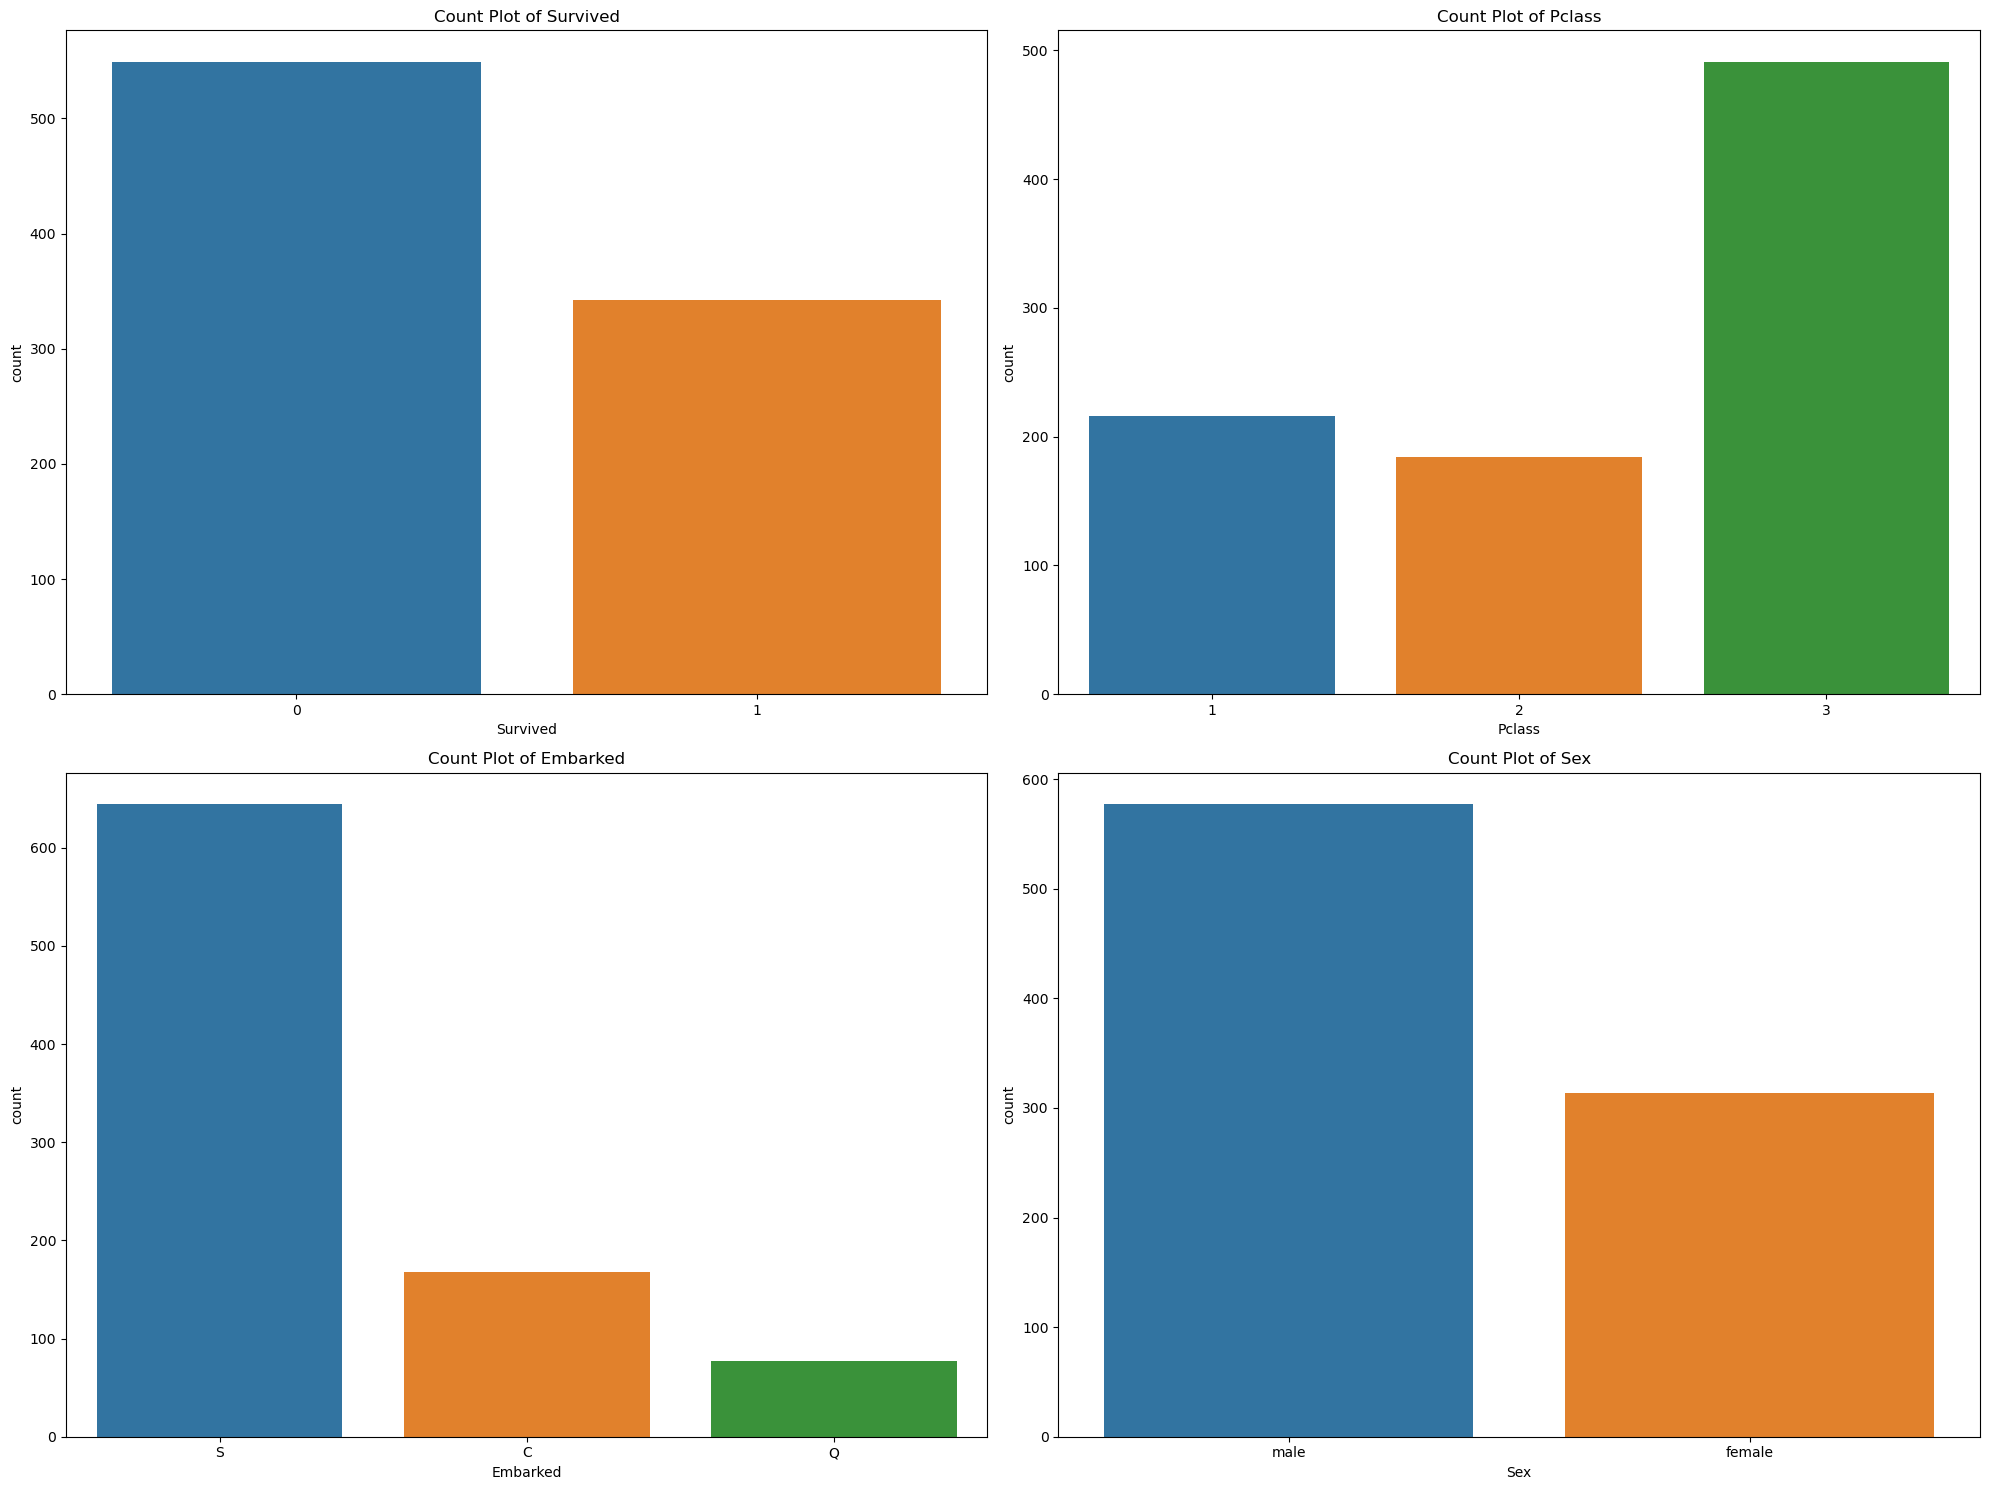

In [26]:
# Bar plots for categorical variables
categorical_vars = ['Survived', 'Pclass', 'Embarked' , 'Sex']
plt.figure(figsize=(20, 15))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=train_df[var])
    plt.title(f'Count Plot of {var}')

plt.tight_layout()
plt.show()

In [27]:
# 2. Data Preprocessing

# a. Handle missing values (e.g., imputation)

train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df.drop(columns=['Cabin'], inplace=True)
print(train_df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [28]:
# b. Encode categorical variables

train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      True       False        True  
1          PC 17599  71.2833     False       False       False  
2  STON/O2. 3101282   7.9250     False       False        True  
3            113803  53.1000     False       False        True  
4

In [29]:
# 3. Model Building

# a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X = train_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = train_df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
     

LogisticRegression(max_iter=1000)

Accuracy: 0.81
Precision: 0.79
Recall: 0.74
F1-score: 0.76
ROC-AUC score: 0.88


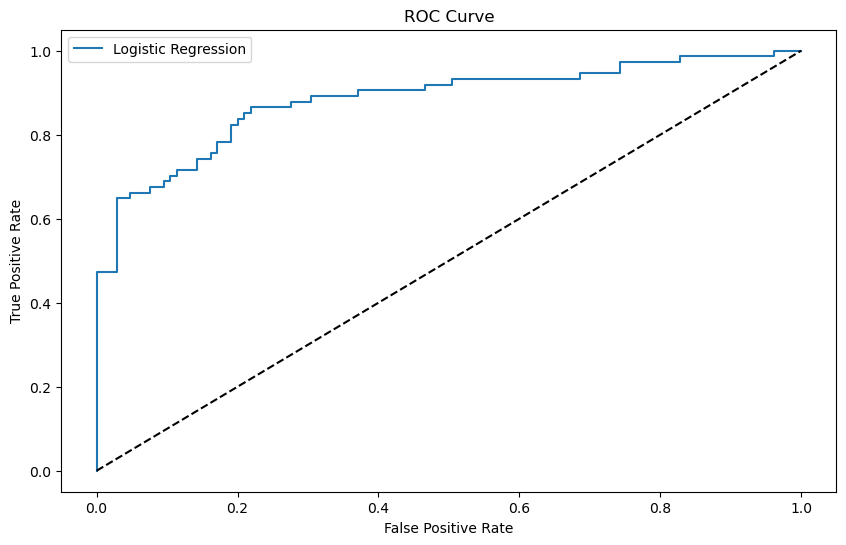

In [30]:

# 4. Model Evaluation

# a. Evaluate the performance of the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'ROC-AUC score: {roc_auc:.2f}')
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [31]:
# 5. Interpretation

# a. Interpret the coefficients of the logistic regression model

import numpy as np
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
})
print(coef_df)

      Feature  Coefficient
0      Pclass    -0.939807
1         Age    -0.030637
2       SibSp    -0.295141
3       Parch    -0.108254
4        Fare     0.002564
5    Sex_male    -2.592598
6  Embarked_Q    -0.111329
7  Embarked_S    -0.399416


## INTERVIEW QUESTIONS:
### Difference between Precision and Recall:
#### Precision measures the proportion of true positives among predicted positives, while recall measures the proportion of true positives among actual positives. Precision focuses on minimizing false positives, and recall emphasizes minimizing false negatives.

### Cross-Validation and Its Importance in Binary Classification:
#### Cross-validation is a technique to assess a model's performance by splitting the dataset into multiple folds and training on each fold while testing on the remaining data. It helps in reducing overfitting and provides a more robust estimate of model performance.
